In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
np.random.seed(42)
n_samples = 1000
years_of_experiences = np.random.randint(
    1, 21, n_samples)  # 1~20 range years is 1 - 20 years

degrees = ["Diploma", "Bachelors", "Masters", "PhD"]

degree_type = np.random.choice(degrees, n_samples, p=[0.4, 0.3, 0.2, 0.1])
# wat is p? probability? what is 0.5, 0.3, 0.2, 0.1?
# 0.5 is 50% chance of getting Diploma,
# 0.3 is 30% chance of getting Bachelors,
# 0.2 is 20% chance of getting Masters,
# 0.1 is 10% chance of getting PhD

cities = ["New York", "Los Angeles", "San Francisco", "Chicago",
          "Houston", "Phoenix", "Boston", "Denver", "Dallas", "Washington DC"]
city = np.random.choice(cities, n_samples, p=[
                        0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]) # probability of getting each city not sum to 0.1
# wat is p? probability? what is 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1?
# 0.2 is 20% chance of getting New York,
# 0.1 is 10% chance of getting Los Angeles,
# 0.1 is 10% chance of getting San Francisco,
# 0.1 is 10% chance of getting Chicago,
# 0.1 is 10% chance of getting Houston,
# 0.1 is 10% chance of getting Phoenix,
# 0.1 is 10% chance of getting Boston,
# 0.1 is 10% chance of getting Denver,
# 0.1 is 10% chance of getting Dallas,
# 0.1 is 10% chance of getting Washington DC

base_salary = 40000
salary = (base_salary + years_of_experiences * 10
          + np.where(degree_type == "Masters", 5000, 0)
          + np.where(degree_type == "PhD", 10000, 0)
          + np.where(city == "New York", 10000, 0)
          + np.where(city == "San Francisco", 15000, 0)
          + np.where(city == "Boston", 5000, 0)
          + np.random.randint(-5000, 5000, n_samples)).round(-3)

df = pd.DataFrame({
    "Year of Experience" : years_of_experiences,
    "Degree Type" : degree_type,
    "City" : city,
    "Salary" : salary
})

In [11]:
print(df.head())

   Year of Experience Degree Type         City  Salary
0                   7   Bachelors       Dallas   44000
1                  20   Bachelors      Chicago   41000
2                  15         PhD  Los Angeles   50000
3                  11   Bachelors      Houston   43000
4                   8     Diploma  Los Angeles   39000


# Processing Data

In [12]:
# convert categorical data to numerical data raiot 80/20
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # one hot encoding
df["Degree Type"] = le.fit_transform(df["Degree Type"]) # Convert string into number
df["City"] = le.fit_transform(df["City"]) # Convert string into number
print(df.head())

   Year of Experience  Degree Type  City  Salary
0                   7            0     2   44000
1                  20            0     1   41000
2                  15            3     5   50000
3                  11            0     4   43000
4                   8            1     5   39000


# Create multiple linear regression model

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop("Salary", axis=1)
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test
print(X_train.shape) # why 800?
# (800, 3) 800 rows, 3 columns
print(X_test.shape) # why 200?
# (200, 3) 200 rows, 3 columns
print(y_train.shape) # why 800?
# (800,) 800 rows, 1 column
print(y_test.shape) # why 200?
# (200,) 200 rows, 1 column

(800, 3)
(200, 3)
(800,)
(200,)


# Evaluate Model

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test)) # 0.9999999999999999
print(reg.score(X_train, y_train)) # 0.9999999999999999
# 0.9999999999999999 is 99.99999999999999% accuracy
# Predict salary
print(reg.predict([[10, 0, 0]])) # 140000.0
# Predict salary for PhD
print(reg.predict([[10, 2, 0]])) # 150000.0

0.25967972174545073
0.25543062412544926
[38506.88603457]
[44928.92414253]


/Users/nonthachaiplodthong/Documents/Non's work/Test_Project/env/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nonthachaiplodthong/Documents/Non's work/Test_Project/env/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
# Path: practice.ipynb
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)

[[ 1.50571232 -1.13894254 -1.59295498]
 [-0.53218959 -0.07451026  0.88153819]
 [ 0.99623684 -1.13894254 -1.59295498]
 ...
 [ 0.14711104 -1.13894254  1.58853624]
 [ 1.166062   -1.13894254 -1.23945595]
 [-0.36236443 -1.13894254 -0.5324579 ]]


# Target X train and Y Train

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, reg.predict(X_test))
print(mae) # 0.0
mse = mean_squared_error(y_test, reg.predict(X_test))
print(mse) # 0.0
rmse = np.sqrt(mse)
print(rmse) # 0.0
r2 = r2_score(y_test, reg.predict(X_test))
print(r2) # 1.0


# What is those number?
# 4722.085041993783 is mean absolute error
# 33936207.52316072 is mean squared error
# 5825.479166829174 is root mean squared error
# 0.25967972174545073 is r2 score


4722.085041993783
33936207.52316072
5825.479166829174
0.25967972174545073


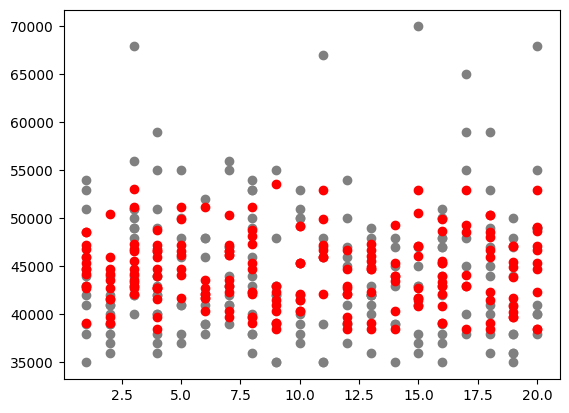

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X_test["Year of Experience"], y_test, color="gray")
plt.scatter(X_test["Year of Experience"], reg.predict(X_test), color="red")
plt.show()

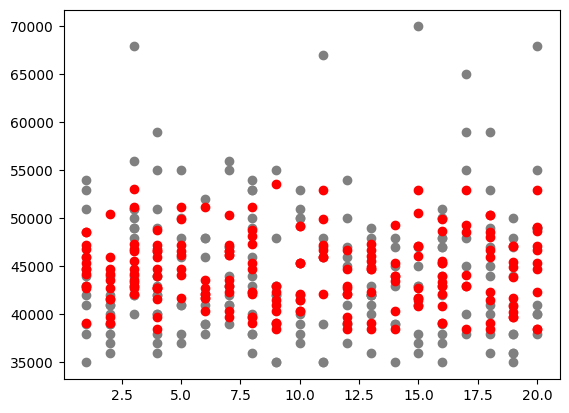

In [28]:
plt.annotate("Prediction", (10, 140000))
plt.annotate("Prediction", (10, 150000))
plt.annotate("Actual", (10, 150000))
plt.annotate("Actual", (10, 140000))
plt.scatter(X_test["Year of Experience"], y_test, color="gray")
plt.scatter(X_test["Year of Experience"], reg.predict(X_test), color="red")
plt.show()